In [3]:
import cv2, shutil

In [2]:
import face_recognition

In [1]:
from mtcnn.mtcnn import MTCNN

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
detector = MTCNN()

In [ ]:
cap = cv2.VideoCapture('videos/salsa_cpp_cam1.avi', 0,)

In [ ]:
face_locations = []

In [ ]:
def get_face(img):
    bb = detector.detect_faces(img)
    bbs = []
    for x in bb:
        if x['confidence'] > 0.95:
            x['size'] = x['box'][2]*x['box'][3]
            bounding_box = x['box']
            bbs.append((bounding_box[0], bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3], bounding_box[1]))

    if len(bbs) == 0:
        return []

    return bbs

In [ ]:
def detectFace(img):
    bb = detector.detect_faces(img)
    bbs = []
    for x in bb:
        if x['confidence'] > 0.985:
            bbs.append(x)

    if len(bbs) == 0:
        return []

    cropp = []
    for i in range(len(bbs)):
        bounding_box = bbs[i]['box']
        h_adj = int(0.5*bounding_box[3])
        w_adj = int(0.5*bounding_box[2])
        cropp.append(img[max(bounding_box[1]-h_adj, 0):max(bounding_box[1]+bounding_box[3]+h_adj, 0), max(bounding_box[0]-w_adj, 0):max(bounding_box[0]+bounding_box[2]+w_adj,0)])
    return cropp

In [ ]:
ind = 0

In [ ]:
import time
st = time.time()

In [ ]:
def writeToFolder(tup):
    ret, rgb_frame = tup
    face_locations = detectFace(rgb_frame)
    ind = random.randint(1, 100000)
    for fc in face_locations:
        fil = 'cache/'+str(ind)+'.jpg'
        cv2.imwrite(fil, fc)
        shutil.move(fil, 'source/')
    return 1

In [ ]:
import random

In [ ]:
writeToFolder(cap.read())

In [ ]:
import multiprocessing as mp

pool = mp.Pool(processes=4)

In [ ]:
type(cap)

In [ ]:
_ = pool.map(writeToFolder, cap.read())

In [ ]:
%%time
while True:
    ret, frame = cap.read()
    rgb_frame = frame[:, :, ::-1]
    t = (rgb_frame, ind)
    _  = pool.map(writeToFolder, t)
    ind+=1

In [ ]:
%%time
while True:
    ret, frame = cap.read()
    rgb_frame = frame[:, :, ::-1]
    
    face_locations = detectFace(rgb_frame)
    
    for fc in face_locations:
        fil = 'cache/'+str(ind)+'.jpg'
        cv2.imwrite(fil, fc)
        shutil.move(fil, 'source/')
        ind += 1
    if cv2.waitKey(25) == 13:
        break


In [16]:
import tensorflow

In [17]:
tensorflow.__version__

'1.14.0'

In [ ]:
import multiprocessing as mp

pool = mp.Pool(processes=4)

In [ ]:
while True:
    ret, frame = cap.read()
    rgb_frame = frame[:, :, ::-1]
        
    face_locations = face_recognition.face_locations(rgb_frame)    
    
    for top, right, bottom, left in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.imshow('Video', frame)

In [ ]:
face_locations

In [5]:
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('photo-1568967729548-e3dbad3d37e0.jpeg')

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

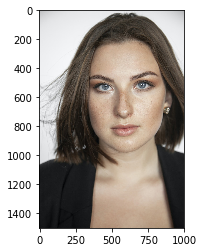

In [12]:
plt.imshow(img)

In [15]:
type(img)

numpy.ndarray

In [8]:
detector.detect_faces(img)

[{'box': [306, 209, 578, 768],
  'confidence': 0.9995055198669434,
  'keypoints': {'left_eye': (446, 531),
   'mouth_left': (490, 810),
   'mouth_right': (701, 799),
   'nose': (581, 704),
   'right_eye': (718, 517)}}]

In [7]:
%%time
face_locations = face_recognition.face_locations(img)

CPU times: user 590 ms, sys: 10.8 ms, total: 600 ms
Wall time: 599 ms


In [9]:
face_recognition.face_landmarks(img)

[{'bottom_lip': [(694, 804),
   (660, 838),
   (626, 857),
   (594, 862),
   (563, 862),
   (529, 851),
   (498, 819),
   (516, 820),
   (563, 817),
   (592, 818),
   (623, 812),
   (676, 807)],
  'chin': [(309, 533),
   (318, 609),
   (335, 682),
   (351, 753),
   (376, 822),
   (416, 881),
   (472, 928),
   (536, 964),
   (602, 974),
   (667, 958),
   (734, 918),
   (793, 871),
   (835, 810),
   (856, 739),
   (866, 663),
   (875, 586),
   (877, 507)],
  'left_eye': [(396, 537),
   (429, 515),
   (472, 517),
   (506, 550),
   (468, 557),
   (425, 556)],
  'left_eyebrow': [(327, 485), (365, 456), (418, 453), (468, 463), (518, 484)],
  'nose_bridge': [(577, 536), (578, 590), (579, 644), (580, 698)],
  'nose_tip': [(535, 727), (558, 738), (585, 747), (611, 735), (635, 722)],
  'right_eye': [(658, 539),
   (691, 503),
   (733, 499),
   (767, 521),
   (739, 541),
   (697, 544)],
  'right_eyebrow': [(631, 469),
   (684, 443),
   (737, 428),
   (792, 432),
   (833, 462)],
  'top_lip': [(498

In [ ]:
import time

In [ ]:
st = time.time()
for i in range(50):
    bounding_box = get_face(img)[0]
ed = time.time()    

In [ ]:
ed-st

In [ ]:
50/12.7

In [ ]:
(bounding_box[0], bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3], bounding_box[1])

In [ ]:
plt.imshow(img)

In [ ]:
cap.release()
cv2.destroyAllWindows()